# DISSERTAÇÃO DE MESTRADO

@author: Guilherme Nogueira

### Importações

In [1]:
# Gerais
import numpy as np
import pandas as pd

# Gráficos
import numpy as np
import plotly.io as pio
import matplotlib.pyplot as plt

# Localização
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

'pt_BR.UTF-8'

### PROGRAMA PRINCIPAL

#### Lendo os Dados

In [2]:
# Lendo a Matriz Insumo Produto da EPE/FIPE
mip_epe = pd.read_excel("..\\data\\mips\\48008000133202507_Ian_Anexo.xlsx", skiprows=4)

# Removendo colunas desnecessárias
mip_epe = mip_epe.loc[:, 'Unnamed: 0':'Unnamed: 84']

# Colocando índice para inicar no 1
mip_epe.index = range(1, len(mip_epe) + 1)

mip_epe.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,S01,S02,S03,S04,S05,S06,S07,...,S73,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84
1,Valores correntes em 1 000 000 R$,NaN,NaN,"Agricultura, inclusive o apoio à agricultura e...","Pecuária, inclusive o apoio à pecuária",Produção florestal; pesca e aquicultura,Extração de carvão mineral e de minerais não-m...,"Extração de petróleo e gás, inclusive as ativi...","Extração de minério de ferro, inclusive benefi...","Extração de minerais metálicos não-ferrosos, i...",...,Serviços domésticos,Consumo Intermediário total,Exportação\nde bens e\nserviços,Consumo\ndo governo,Consumo\ndas\n ISFLSF,Consumo \ndas famílias,Formação bruta\nde capital fixo,Variação\nde estoque,Demanda\nfinal,Demanda\ntotal
2,NaN,Número identificador,0.0,1,2,3,4,5,6,7,...,73,74,75,76,77,78,79,80,81,82
3,S01,"Agricultura, inclusive o apoio à agricultura e...",1.0,8170.358564,5290.224615,156.755416,1.826594,9.869268,1.143498,1.784145,...,0,180926.415431,150718.720707,48.304678,0,71191.69866,3188.257846,-8036.397321,217110.584569,398037
4,S02,"Pecuária, inclusive o apoio à pecuária",2.0,1004.959948,6106.811083,183.362642,3.725192,22.939,1.949438,3.244134,...,0,101821.568841,7635.51568,3.187532,0,27053.775014,16625.080156,-1180.127222,50137.431159,151959
5,S03,Produção florestal; pesca e aquicultura,3.0,1414.916247,1437.281917,2063.411671,1.790754,1.823688,0.170106,0.241128,...,0,15970.314929,3068.15858,2.442706,0,17611.770193,1054.002991,163.310602,21899.685071,37870


In [3]:
# Lendo a Matriz Insumo Produto da EPE/FIPE
mip_emp = pd.read_excel("..\\data\\mips\\48008000133202507_Ian_Anexo.xlsx", sheet_name="Emprego")

# Removendo colunas desnecessárias
mip_emp = mip_emp[['empregados']]

mip_emp.head()

,empregados
0,6687599.0
1,5891326.0
2,801096.0
3,118276.0
4,50144.0


#### Guardando informações adicionais

In [4]:
# Guardando um dataframe com os códigos e o que representa
variables = mip_epe.iloc[:, 3:85]

# Mantém como DataFrame de 1 linha
variables = variables.iloc[[0,1]]

# Transpor o dataframe
variables = variables.T

# Transformar o índice em coluna 'id' e só então resetar
variables = variables.reset_index(drop=True)

# Renomeando
variables = variables.rename(columns={1: 'Setor', 2: 'ID'})

# Colocando índice para inicar no 1
# variables.index = range(1, len(variables) + 1)

variables = variables[["ID", "Setor"]]

variables.head(10)

,ID,Setor
0,1,"Agricultura, inclusive o apoio à agricultura e..."
1,2,"Pecuária, inclusive o apoio à pecuária"
2,3,Produção florestal; pesca e aquicultura
3,4,Extração de carvão mineral e de minerais não-m...
4,5,"Extração de petróleo e gás, inclusive as ativi..."
5,6,"Extração de minério de ferro, inclusive benefi..."
6,7,"Extração de minerais metálicos não-ferrosos, i..."
7,8,"Abate e produtos de carne, inclusive os produt..."
8,9,Fabricação e refino de açúcar
9,10,Outros produtos alimentares


#### Limpando a MIP

In [5]:
mip_epe.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,S01,S02,S03,S04,S05,S06,S07,...,S73,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84
1,Valores correntes em 1 000 000 R$,NaN,NaN,"Agricultura, inclusive o apoio à agricultura e...","Pecuária, inclusive o apoio à pecuária",Produção florestal; pesca e aquicultura,Extração de carvão mineral e de minerais não-m...,"Extração de petróleo e gás, inclusive as ativi...","Extração de minério de ferro, inclusive benefi...","Extração de minerais metálicos não-ferrosos, i...",...,Serviços domésticos,Consumo Intermediário total,Exportação\nde bens e\nserviços,Consumo\ndo governo,Consumo\ndas\n ISFLSF,Consumo \ndas famílias,Formação bruta\nde capital fixo,Variação\nde estoque,Demanda\nfinal,Demanda\ntotal
2,NaN,Número identificador,0.0,1,2,3,4,5,6,7,...,73,74,75,76,77,78,79,80,81,82
3,S01,"Agricultura, inclusive o apoio à agricultura e...",1.0,8170.358564,5290.224615,156.755416,1.826594,9.869268,1.143498,1.784145,...,0,180926.415431,150718.720707,48.304678,0,71191.69866,3188.257846,-8036.397321,217110.584569,398037
4,S02,"Pecuária, inclusive o apoio à pecuária",2.0,1004.959948,6106.811083,183.362642,3.725192,22.939,1.949438,3.244134,...,0,101821.568841,7635.51568,3.187532,0,27053.775014,16625.080156,-1180.127222,50137.431159,151959
5,S03,Produção florestal; pesca e aquicultura,3.0,1414.916247,1437.281917,2063.411671,1.790754,1.823688,0.170106,0.241128,...,0,15970.314929,3068.15858,2.442706,0,17611.770193,1054.002991,163.310602,21899.685071,37870


In [6]:
# Transformanda a linha 1 como cabeçalho, para ficar apenas números
mip_epe.columns = mip_epe.iloc[1].astype(str).str.strip()

# Removendo as linhas desncessárias
mip_energia = mip_epe.iloc[2:].reset_index(drop=True)

# Renomeando a coluna do Número Identificador
mip_energia = mip_energia.rename(columns={
    "nan": "ID",
    "Número identificador": "Setor",
    "0.0": "ID Numero",
})

# Removendo as linhas de totais
mip_energia = mip_energia.iloc[:73].reset_index(drop=True)

# Colocando índice para inicar no 1
# mip_energia.index = range(1, len(mip_energia) + 1)

mip_energia.head()

2,ID,Setor,ID Numero,1,2,3,4,5,6,7,...,73,74,75,76,77,78,79,80,81,82
0,S01,"Agricultura, inclusive o apoio à agricultura e...",1.0,8170.358564,5290.224615,156.755416,1.826594,9.869268,1.143498,1.784145,...,0,180926.415431,150718.720707,48.304678,0,71191.69866,3188.257846,-8036.397321,217110.584569,398037
1,S02,"Pecuária, inclusive o apoio à pecuária",2.0,1004.959948,6106.811083,183.362642,3.725192,22.939,1.949438,3.244134,...,0,101821.568841,7635.51568,3.187532,0,27053.775014,16625.080156,-1180.127222,50137.431159,151959
2,S03,Produção florestal; pesca e aquicultura,3.0,1414.916247,1437.281917,2063.411671,1.790754,1.823688,0.170106,0.241128,...,0,15970.314929,3068.15858,2.442706,0,17611.770193,1054.002991,163.310602,21899.685071,37870
3,S04,Extração de carvão mineral e de minerais não-m...,4.0,154.571314,418.656284,13.284636,255.387462,731.238716,0.308747,1.358716,...,0,18508.780939,1808.126347,0.074827,0,199.54565,9.766335,-515.294097,1502.219061,20011
4,S05,"Extração de petróleo e gás, inclusive as ativi...",5.0,21.840529,15.400401,0.888832,2.855772,6630.161209,276.153363,28.805251,...,0,133407.137614,92727.090258,0,0,602.278354,11369.449472,-12167.955698,92530.862386,225938


#### Matriz Z (setores z setores)

In [7]:
# Zι é a demanda intermediária total pelo produto de cada setor (soma das linhas de 𝑍, se 𝑧𝑖𝑗​ for a venda do setor 𝑖 para o setor 𝑗).

# Selecionando apenas setores
Z = mip_energia.loc[:73, '1':'73']
Z = np.array(Z)

print("Matriz Z (Fluxo entre setores):\n")
print("\n".join(" ".join(f"{v:>10.2f}" for v in row) for row in Z[:5, :5]))

Matriz Z (Fluxo entre setores):

   8170.36    5290.22     156.76       1.83       9.87
   1004.96    6106.81     183.36       3.73      22.94
   1414.92    1437.28    2063.41       1.79       1.82
    154.57     418.66      13.28     255.39     731.24
     21.84      15.40       0.89       2.86    6630.16


#### Vetor de Demanda Final (f)

In [8]:
# f é a demanda final (famílias, governo, FBCF, estoques, exportações).

# Vetor de Demanda Final (f)
f = mip_energia["81"].values.reshape(-1, 1)

print("\nVetor de Demanda Final (f):\n")
print("\n".join(f"{v:>10.2f}" for v in f.ravel()[:10]))


Vetor de Demanda Final (f):

 217110.58
  50137.43
  21899.69
   1502.22
  92530.86
  73313.87
   9924.99
 236645.65
  33288.97
 221291.87


#### Vetor de Produção Total (x)

In [9]:
#
# Vetor de Produção Total 
#
#  x = Z1 + f

# Calculando o vetor de produção total (x)
x_intermediario = Z.sum(axis=1).reshape(-1, 1)  # Soma dos fluxos intermediários (por linha) coluna df_z["Total Produto"]

# Calculando o vetor de produção total (x)
x = x_intermediario + f

# Exibindo os resultados
print("Vetor de Produção Total (x):")
print("\n".join(f"{v:>10.2f}" for v in x.ravel()[:10]))

Vetor de Produção Total (x):
 398037.00
 151959.00
  37870.00
  20011.00
 225938.00
  92326.00
  18273.00
 292406.00
  51555.00
 324943.00


#### Matriz de Coeficientes Técnicos (A)

In [10]:
#
# Matriz de Coeficientes Técnicos 
#
# A = Z × x^-1
# 

# inversa diagonal de x
X_inv = np.diag(1 / x.flatten())  

# Calcular matriz de coeficientes técnicos A
A = Z @ X_inv

# Garantir que todos os valores sejam float64
A = A.astype(float)

# Exibindo as primeiras linhas da Matriz A
print("\nMatriz de Coeficientes Técnicos (A):\n")
print("\n".join("".join(f"{v:>10.4f}" for v in row) for row in A[:5, :5]))


Matriz de Coeficientes Técnicos (A):

    0.0205    0.0348    0.0041    0.0001    0.0000
    0.0025    0.0402    0.0048    0.0002    0.0001
    0.0036    0.0095    0.0545    0.0001    0.0000
    0.0004    0.0028    0.0004    0.0128    0.0032
    0.0001    0.0001    0.0000    0.0001    0.0293


In [11]:
# Verificando as dimensões
print(f"Dimensão da Matriz Z: {Z.shape}")
print(f"\nDimensão do Vetor f: {f.shape}")
print(f"\nDimensão do Vetor x: {x.shape}")
print(f"\nDimensão do Vetor A: {A.shape}")

Dimensão da Matriz Z: (73, 73)

Dimensão do Vetor f: (73, 1)

Dimensão do Vetor x: (73, 1)

Dimensão do Vetor A: (73, 73)


#### Matriz Inversa de Leontief (L)

In [12]:
# Criando a Matriz Identidade (I) com o mesmo tamanho de A
I = np.eye(A.shape[0])

# Calculando a Inversa de Leontief (L)
try:
    L = np.linalg.inv(I - A)
except np.linalg.LinAlgError:
    print("A matriz (I - A) é singular e não pode ser invertida.")
    L = None

# Exibindo as primeiras linhas da Matriz L
if L is not None:
    print("\nMatriz Inversa de Leontief (L):")
    print("\n".join("".join(f"{v:>10.4f}" for v in row) for row in L[:5, :5]))


Matriz Inversa de Leontief (L):
    1.0271    0.0679    0.0136    0.0083    0.0051
    0.0032    1.0488    0.0063    0.0009    0.0005
    0.0044    0.0116    1.0580    0.0006    0.0004
    0.0039    0.0052    0.0010    1.0143    0.0045
    0.0225    0.0212    0.0114    0.0314    1.0434


#### Valor Adicionado (VA)

In [13]:
n = Z.shape[0]

# Calcular Valor Adicionado (VA)

# Fórmula teórica:
#     VA_i = x_i - Σ_j z_ij
VA = x - Z.sum(axis=1)

## MULTIPLICADORES

### Multiplicador de Produção

In [14]:
#
# mx ​ = L ⋅ i
#

n = A.shape[0]

i = np.ones((n, 1)) # vetor coluna de 1s

m_x = L @ i                # multiplicador de produção

# Dataframe
df_multi_producao = pd.DataFrame({
    "ID": np.arange(1, n+1),
    "Setor": variables["Setor"][:n].to_numpy(),
    "M_Producao": np.ravel(m_x),
})

In [15]:
print(df_multi_producao.head(10))

   ID                                              Setor  M_Producao
0   1  Agricultura, inclusive o apoio à agricultura e...    3.502012
1   2             Pecuária, inclusive o apoio à pecuária    1.579636
2   3            Produção florestal; pesca e aquicultura    1.288964
3   4  Extração de carvão mineral e de minerais não-m...    1.244486
4   5  Extração de petróleo e gás, inclusive as ativi...    3.458744
5   6  Extração de minério de ferro, inclusive benefi...    1.290503
6   7  Extração de minerais metálicos não-ferrosos, i...    1.222781
7   8  Abate e produtos de carne, inclusive os produt...    1.372518
8   9                      Fabricação e refino de açúcar    1.252962
9  10                        Outros produtos alimentares    1.840129


In [ ]:
res_df_multi_producao = df_multi_producao.sort_values("M_Producao", ascending=False)

# arredondar para 2 casas antes de salvar o CSV.
res_df_multi_producao["M_Producao"] = res_df_multi_producao["M_Producao"].map(lambda x: f"{x:.2f}")

# exportando para csv, para ler no latex
res_df_multi_producao.head(10).to_csv("..\\data\\cenarios\\base\\cen_base_multi_producao.csv", index=False, sep=";", encoding="utf-8-sig")

print("🔹 Setores com os Maiores Multiplicadores de Produção:")
print(res_df_multi_producao.head(10)[["ID", "Setor", "M_Producao"]].to_string(index=False))

🔹 Setores com os Maiores Multiplicadores de Produção:
 ID                                                                 Setor M_Producao
 47          Comércio por atacado e a varejo, exceto veículos automotores       6.93
 19                                                 Derivados de petróleo       5.73
 48                                                  Transporte terrestre       4.25
 58          Intermediação financeira, seguros e previdência complementar       4.16
 60     Atividades jurídicas, contábeis, consultoria e sedes de empresas        3.56
 23 Fabricação de químicos orgânicos e inorgânicos, resinas e elastômeros       3.55
  1         Agricultura, inclusive o apoio à agricultura e a pós-colheita       3.50
  5          Extração de petróleo e gás, inclusive as atividades de apoio       3.46
 40                              Geração centralizada de energia elétrica       2.97
 64           Outras atividades administrativas e serviços complementares       2.84


### Multiplicadores de Emprego

In [17]:
E = np.array(mip_emp["empregados"]).reshape(-1, 1)

e = (E / x).reshape(1, n)           # coeficiente de emprego

m_E = e @ L                         # multiplicador de emprego

# Dataframe
df_multi_emprego = pd.DataFrame({
    "ID": np.arange(1, n+1),
    "Setor": variables["Setor"][:n].to_numpy(),
    "M_Emprego": np.ravel(m_E),
})

In [59]:
res_df_multi_emprego = df_multi_emprego.sort_values("M_Emprego", ascending=False)

# arredondar para 2 casas antes de salvar o CSV.
res_df_multi_emprego["M_Emprego"] = res_df_multi_emprego["M_Emprego"].map(lambda x: f"{x:.2f}")

# exportando para csv, para ler no latex
res_df_multi_emprego.to_csv("..\\data\\cenarios\\base\\cen_base_multi_emprego.csv", index=False, sep=";", encoding="utf-8-sig")

print("🔹 Setores com os Maiores Multiplicadores de Emprego:")
print(res_df_multi_emprego.head(10)[["ID", "Setor", "M_Emprego"]].to_string(index=False))

🔹 Setores com os Maiores Multiplicadores de Emprego:
 ID                                                                    Setor M_Emprego
 73                                                      Serviços domésticos     88.16
  2                                   Pecuária, inclusive o apoio à pecuária     45.94
 14                         Confecção de artefatos do vestuário e acessórios     33.52
 72                     Organizações associativas e outros serviços pessoais     31.89
 71                        Atividades artísticas, criativas e de espetáculos     31.68
 53                                                              Alimentação     26.97
  3                                  Produção florestal; pesca e aquicultura     24.54
  8 Abate e produtos de carne, inclusive os produtos do laticínio e da pesca     23.62
 68                                                         Educação privada     22.75
 52                                                               Alojamento 

In [19]:
# IDs dos setores energéticos
ids_energia = [19, 20, 22, 40, 41, 43]

# filtra no dataframe já ordenado
res_energia = res_df_multi_emprego[res_df_multi_emprego["ID"].isin(ids_energia)]

print("🔹 Multiplicadores de Emprego - Setores Energéticos:")
print(res_energia[["ID", "Setor", "M_Emprego"]].to_string(index=False))

🔹 Multiplicadores de Emprego - Setores Energéticos:
 ID                                    Setor M_Emprego
 22            Fabricação de biocombustíveis     14.48
 19                    Derivados de petróleo      4.63
 20                                Biodiesel      4.43
 41  Geração distribuída de energia elétrica      3.96
 40 Geração centralizada de energia elétrica      3.89
 43                              Gás Natural      2.81


### Multiplicadores de Valor Adicionado (PIB)

In [20]:
# Coeficiente de Renda (r_i)
income_coeff = VA / x

# Multiplicador de Renda Total
mult_income = income_coeff @ L

# Organização dos Resultados
df_multi_income = pd.DataFrame({
    "ID": np.arange(1, n+1),
    "Setor": variables["Setor"][0:73],
    "Coef_Renda": np.asarray(income_coeff).reshape(-1)[:n],
    "Mult_Renda_Total": np.asarray(mult_income).reshape(-1)[:n]
})

In [ ]:
res_df_multi_income = df_multi_income.sort_values("Mult_Renda_Total", ascending=False)

# arredondar para 2 casas antes de salvar o CSV.
res_df_multi_income["Coef_Renda"] = res_df_multi_income["Coef_Renda"].map(lambda x: f"{x:.2f}")
res_df_multi_income["Mult_Renda_Total"] = res_df_multi_income["Mult_Renda_Total"].map(lambda x: f"{x:.2f}")

# exportando para csv, para ler no latex
res_df_multi_income.head(10).to_csv("..\\data\\cenarios\\base\\cen_base_multi_pib.csv", index=False, sep=";", encoding="utf-8-sig")

print("🔹 Setores com os Maiores Multiplicadores de PIB:")
print(res_df_multi_income.head(10)[["ID", "Setor", "Coef_Renda", "Mult_Renda_Total"]].to_string(index=False))

🔹 Setores com os Maiores Multiplicadores de PIB:
 ID                                                                      Setor Coef_Renda Mult_Renda_Total
 21                                                                  Coquerias       0.99             2.54
 35                 Fabricação de automóveis, caminhões e ônibus, exceto peças       0.98             1.82
  8   Abate e produtos de carne, inclusive os produtos do laticínio e da pesca       0.86             1.68
  9                                              Fabricação e refino de açúcar       0.95             1.67
 41                                    Geração distribuída de energia elétrica       0.93             1.64
 22                                              Fabricação de biocombustíveis       0.94             1.64
 25 Fabricação de produtos de limpeza, cosméticos/perfumaria e higiene pessoal       0.97             1.61
 20                                                                  Biodiesel       0.98      

## SETORES DE ENERGIA

- S19:	Derivados de petróleo
- S20:	Biodiesel
- S22:	Fabricação de biocombustíveis
- S40:	Geração centralizada de energia elétrica
- S41:	Geração distribuída de energia elétrica
- S43:	Gás Natural

In [22]:
# -----------------------------------------
#  Cálculo dos efeitos em EMPREGO
# -----------------------------------------

# vetor de emprego no ano-base (1 valor por setor, mesma ordem de x/VA)
emp = mip_emp["empregados"].to_numpy(dtype=float).ravel()  # <-- troque "Emprego" se o nome for outro

# só por segurança:
assert len(emp) == len(x), "Comprimento de Emp e x não bate!"


In [23]:
print("A:", A.shape)
print("L:", L.shape)
print("f:", f.shape)
print("x:", x.shape)
print("VA:", VA.shape)
print("emp:", emp.shape)

A: (73, 73)
L: (73, 73)
f: (73, 1)
x: (73, 1)
VA: (73, 73)
emp: (73,)


In [31]:
# DataFrame vazio para consolidar os cenários
resumo_cenarios = []

### Estimação do Cenário 1

In [24]:
# --- índices 0-based dos setores na matriz ---
i_S19 = 18   # Derivados de petróleo
i_S20 = 19   # Biodiesel
i_S22 = 21   # Etanol / Fabricação de biocombustíveis
i_S40 = 39   # Geração centralizada
i_S41 = 40   # Geração distribuída
i_S43 = 42   # Gás natural

# --- garante tipos e formatos ---
n = L.shape[0]
f = np.array(f, dtype=float).reshape(n,)
x = np.array(x, dtype=float).reshape(n,)
VA = np.array(VA, dtype=float)
L = np.array(L, dtype=float).reshape(n, n)
A = np.array(A, dtype=float)
Z = np.array(Z, dtype=float)
emp = np.array(emp, dtype=float).reshape(n,)

if VA.ndim == 2 and VA.shape == (n, n):
    # caso mais comum: VA está como matriz diagonal (ou quase-diagonal)
    # então o VA setorial está na diagonal
    VA = np.diag(VA)
elif VA.ndim == 2 and VA.shape[0] == n and VA.shape[1] == 1:
    VA = VA.reshape(n,)
elif VA.ndim == 1 and VA.size == n:
    VA = VA.reshape(n,)
else:
    raise ValueError(f"Formato inesperado de VA: {VA.shape}")

# --- inicializa Δf ---
delta_f = np.zeros_like(f, dtype=float)

# ============================================================
#   Corte total (-100%) em derivados de petróleo e gás natural
# ============================================================
cut_petroleo = -f[i_S19]
cut_gas = -f[i_S43]     

delta_f[i_S19] += cut_petroleo
delta_f[i_S43] += cut_gas

# soma total cortada
montante_cortado_cen1 = -(cut_petroleo + cut_gas)

# ============================================================
#  Redistribuição do corte de DERIVADOS DE PETRÓLEO
# ============================================================

peso_petroleo = {
    i_S20: 0.621,                            # Biodiesel
    i_S22: 0.379 * 0.9624,                   # Etanol
    i_S40: 0.379 * 0.0362,                   # Eletricidade centralizada
    i_S41: 0.379 * 0.0014,                   # Eletricidade distribuída
}

# normaliza apenas por segurança numérica
soma_p = sum(peso_petroleo.values())
for k, w in peso_petroleo.items():
    delta_f[k] += -cut_petroleo * (w / soma_p)

# ============================================================
#   Redistribuição do corte de GÁS NATURAL (50% etanol / 50% biodiesel)
# ============================================================
peso_gas = {
    i_S22: 0.50,   # Etanol
    i_S20: 0.50,   # Biodiesel
}
soma_g = sum(peso_gas.values())  # (=1.0) mantido por segurança
for k, w in peso_gas.items():
    delta_f[k] += -cut_gas * (w / soma_g)

# ============================================================
#   Efeitos setoriais e em VA
# ============================================================
delta_x = L @ delta_f
x_novo = x + delta_x
va_coeff = np.divide(VA, x, out=np.zeros_like(VA), where=x!=0)
delta_VA = va_coeff * delta_x

# coeficientes de emprego: empregos por unidade de produção
emp_coeff = np.divide(emp, x, out=np.zeros_like(emp, dtype=float), where=x != 0)

# variação de emprego por setor (efeito total: direto + indireto)
delta_emp = emp_coeff * delta_x

# ============================================================
#  DataFrame com resultados + nomes dos setores
# ============================================================

cen1 = pd.DataFrame({
    "ID": np.arange(len(delta_x)) + 1,
    "delta_f": delta_f.ravel(),
    "delta_x": delta_x.ravel(),
    "delta_VA": delta_VA.ravel(),
    "emp_coeff": emp_coeff,   # empregos por unidade de produção
    "delta_emp": delta_emp    # variação de empregos no cenário
})

# faz merge com a tabela de setores
cen1 = cen1.merge(variables, on="ID", how="left")

In [32]:
resumo_cenarios.append({
    "Cenario": "Cenário 1",
    "Delta_x": delta_x.sum(),
    "Delta_VA": delta_VA.sum(),
    "Delta_f": delta_f.sum(),
    "Montante_Redistribuido": montante_cortado_cen1
})

In [34]:
# ============================================================
#  Resultados agregados
# ============================================================

print("\nCENÁRIO 1:")

print("\nΔVA total:", delta_VA.sum())
print("Δx total:", delta_x.sum())

print("Soma(Δf) =", delta_f.sum())   # ≈ 0  (substituição pura)
print("Redução total de fósseis (R$):", montante_cortado_cen1) # montante_cortado cut_petroleo + cut_gas


CENÁRIO 1:

ΔVA total: -4862.63932304845
Δx total: 6194.233473472916
Soma(Δf) = 1.4551915228366852e-11
Redução total de fósseis (R$): 143660.62181908297


In [35]:
# ============================================================
#  Tabelas resumo
# ============================================================

cols = ["ID", "Setor", "delta_x", "delta_VA"]

# 1) garantir que delta_x e delta_VA são numéricos
cen1_num = cen1[cols].copy()
cen1_num["delta_x"]  = pd.to_numeric(cen1_num["delta_x"], errors="coerce")
cen1_num["delta_VA"] = pd.to_numeric(cen1_num["delta_VA"], errors="coerce")

# 2) ordenar corretamente (numérico!)
cen1_sorted = cen1_num.sort_values("delta_x", ascending=False)

top10_num = cen1_sorted.head(10)
bot10_num = cen1_sorted.tail(10).sort_values("delta_x", ascending=True)

# 3) criar versão formatada APENAS para saída
def formatar(df):
    out = df.copy()
    out["delta_x"]  = out["delta_x"].map(lambda x: f"{x:.2f}")
    out["delta_VA"] = out["delta_VA"].map(lambda x: f"{x:.2f}")
    return out

top10 = formatar(top10_num)
bot10 = formatar(bot10_num)

# 4) exportar CSV
top10.to_csv( "..\\data\\cenarios\\cenario1\\cen1_producao_ganhos.csv", index=False, sep=";", encoding="utf-8-sig")

bot10.to_csv( "..\\data\\cenarios\\cenario1\\cen1_producao_perdas.csv", index=False, sep=";", encoding="utf-8-sig")

# 5) prints
print("🔹 Top 10 maiores ganhos de produção (Cenário 1):")
print(top10.to_string(index=False))

print("\n🔻 Top 10 maiores perdas de produção (Cenário 1):")
print(bot10.to_string(index=False))


🔹 Top 10 maiores ganhos de produção (Cenário 1):
ID                                                                 Setor  delta_x delta_VA
20                                                             Biodiesel 88817.27  3853.93
22                                         Fabricação de biocombustíveis 49789.32 27423.74
 1         Agricultura, inclusive o apoio à agricultura e a pós-colheita 20721.79 11302.77
23 Fabricação de químicos orgânicos e inorgânicos, resinas e elastômeros  3316.49   440.82
10                                           Outros produtos alimentares  2658.33  1810.37
48                                                  Transporte terrestre  2082.03   701.83
40                              Geração centralizada de energia elétrica  1982.23   721.35
24  Fabricação de defensivos, desinfestantes, tintas e químicos diversos  1561.29   270.26
58          Intermediação financeira, seguros e previdência complementar  1222.64   568.43
47          Comércio por atacado e a vare

In [36]:
# ============================================================
#  Tabelas resumo - Emprego
# ============================================================

cols_emp = ["ID", "Setor", "delta_emp", "emp_coeff"]

# 1) garantir que as colunas numéricas são numéricas (float)
cen1_emp_num = cen1[cols_emp].copy()
cen1_emp_num["delta_emp"]  = pd.to_numeric(cen1_emp_num["delta_emp"], errors="coerce")
cen1_emp_num["emp_coeff"]  = pd.to_numeric(cen1_emp_num["emp_coeff"], errors="coerce")

# 2) ordenar corretamente (numérico)
cen1_sorted_emp = cen1_emp_num.sort_values("delta_emp", ascending=False)

top10_emp_num = cen1_sorted_emp.head(10)
bot10_emp_num = cen1_sorted_emp.tail(10).sort_values("delta_emp", ascending=True)  # mais negativo -> menos negativo

# 3) formatar APENAS para exportação/print (sem notação científica)
def formatar_emp(df):
    out = df.copy()
    out["delta_emp"] = out["delta_emp"].map(lambda x: f"{x:.2f}")
    out["emp_coeff"] = out["emp_coeff"].map(lambda x: f"{x:.2f}")
    return out

top10_emp = formatar_emp(top10_emp_num)
bot10_emp = formatar_emp(bot10_emp_num)

# 4) exportar CSV (LaTeX/Excel)
top10_emp.to_csv( "..\\data\\cenarios\\cenario1\\cen1_emprego_ganhos.csv", index=False, sep=";", encoding="utf-8-sig" )

bot10_emp.to_csv( "..\\data\\cenarios\\cenario1\\cen1_emprego_perdas.csv", index=False, sep=";", encoding="utf-8-sig" )

# 5) prints
print("🔹 Top 10 maiores GANHOS de emprego (Cenário 1):")
print(top10_emp.to_string(index=False))

print("\n🔻 Top 10 maiores PERDAS de emprego (Cenário 1):")
print(bot10_emp.to_string(index=False))


🔹 Top 10 maiores GANHOS de emprego (Cenário 1):
ID                                                          Setor delta_emp emp_coeff
 1  Agricultura, inclusive o apoio à agricultura e a pós-colheita 348156.18     16.80
22                                  Fabricação de biocombustíveis  89537.30      1.80
20                                                      Biodiesel  22383.18      0.25
48                                           Transporte terrestre  21282.29     10.22
 2                         Pecuária, inclusive o apoio à pecuária  18809.76     38.77
47   Comércio por atacado e a varejo, exceto veículos automotores  12135.15     14.54
10                                    Outros produtos alimentares  10513.57      3.95
64    Outras atividades administrativas e serviços complementares   8141.79     15.97
39  Manutenção, reparação e instalação de máquinas e equipamentos   3199.52      6.66
51 Armazenamento, atividades auxiliares dos transportes e correio   3159.64      5.82

🔻 Top

### Estimação do Cenário 2

In [37]:
# --- índices 0-based dos setores ---
i_S19 = 18   # Derivados de petróleo
i_S20 = 19   # Biodiesel
i_S22 = 21   # Etanol / Fabricação de biocombustíveis
i_S40 = 39   # Geração centralizada
i_S41 = 40   # Geração distribuída
i_S43 = 42   # Gás natural

# --- garante tipos e formatos ---
f = np.array(f, dtype=float)
x = np.array(x, dtype=float)
VA = np.array(VA, dtype=float)
L = np.array(L, dtype=float)
A = np.array(A, dtype=float)
Z = np.array(Z, dtype=float)

# --- inicializa Δf ---
delta_f = np.zeros_like(f, dtype=float)

# ============================================================
#  CENÁRIO 2: cortes
#  - corta apenas a FRAÇÃO GASOLINA dos derivados de petróleo (0,379)
#  - zera gás natural
#  - mantém etanol e biodiesel
# ============================================================

cut_gasolina_petroleo = -(0.379 * f[i_S19])   # só a parte "gasolina" dentro de petróleo
cut_gas = -f[i_S43]                           # zera gás natural

delta_f[i_S19] += cut_gasolina_petroleo
delta_f[i_S43] += cut_gas

# ============================================================
#  Redistribuição da gasolina: 80% eletricidade, 20% permanece petróleo
# ============================================================

montante_gasolina = -cut_gasolina_petroleo    # valor positivo

# 20% volta para derivados de petróleo (remanescente)
delta_f[i_S19] += montante_gasolina * 0.20

# 80% vai para eletricidade (95% GC / 5% GD)
delta_f[i_S40] += montante_gasolina * 0.80 * 0.95
delta_f[i_S41] += montante_gasolina * 0.80 * 0.05

# ============================================================
#  Redistribuição do gás natural: 100% para eletricidade (95% GC / 5% GD)
# ============================================================

montante_gas = -cut_gas  # positivo

delta_f[i_S40] += montante_gas * 0.95
delta_f[i_S41] += montante_gas * 0.05

# ============================================================
#  Efeitos setoriais
# ============================================================
delta_x = L @ delta_f
x_novo = x + delta_x
va_coeff = np.divide(VA, x, out=np.zeros_like(VA), where=x!=0)
delta_VA = va_coeff * delta_x

# -----------------------------------------
#  Efeitos em EMPREGO (CENÁRIO 1)
# -----------------------------------------

# coeficientes de emprego: empregos por unidade de produção
emp_coeff = np.divide(emp, x, out=np.zeros_like(emp, dtype=float), where=x != 0)

# variação de emprego por setor (efeito total: direto + indireto)
delta_emp = emp_coeff * delta_x

# ============================================================
#  DataFrame com resultados + nomes dos setores
# ============================================================
cen2 = pd.DataFrame({
    "ID": np.arange(len(delta_x)) + 1,  # ajusta +1 para casar com o dataframe variables
    "delta_f": delta_f,
    "delta_x": delta_x,
    "delta_VA": delta_VA,
    "emp_coeff": emp_coeff,   # empregos por unidade de produção
    "delta_emp": delta_emp    # variação de empregos no cenário
}).merge(variables, on="ID", how="left")

In [38]:
resumo_cenarios.append({
    "Cenario": "Cenário 1",
    "Delta_x": delta_x.sum(),
    "Delta_VA": delta_VA.sum(),
    "Delta_f": delta_f.sum(),
    "Montante_Redistribuido": montante_cortado_cen1
})

In [40]:
# ============================================================
#  Resultados agregados
# ============================================================

print("\nCENÁRIO 2:")

print("\nΔVA total:", delta_VA.sum())
print("Δx total:", delta_x.sum())

print("Soma(Δf) =", delta_f.sum())  # deve ≈ 0
print("Total cortado (R$):", montante_gasolina+montante_gas)


CENÁRIO 2:

ΔVA total: -2829.802380069381
Δx total: -8048.15371552563
Soma(Δf) = 0.0
Total cortado (R$): 60730.78851191623


In [41]:
# ============================================================
#  Tabelas resumo
# ============================================================

cols = ["ID", "Setor", "delta_x", "delta_VA"]

# 1) garantir que delta_x e delta_VA são numéricos
cen2_num = cen2[cols].copy()
cen2_num["delta_x"]  = pd.to_numeric(cen2_num["delta_x"], errors="coerce")
cen2_num["delta_VA"] = pd.to_numeric(cen2_num["delta_VA"], errors="coerce")

# 2) ordenar corretamente (numérico!)
cen2_sorted = cen2_num.sort_values("delta_x", ascending=False)

top10_num = cen2_sorted.head(10)
bot10_num = cen2_sorted.tail(10).sort_values("delta_x", ascending=True)

# 3) criar versão formatada APENAS para saída
def formatar(df):
    out = df.copy()
    out["delta_x"]  = out["delta_x"].map(lambda x: f"{x:.2f}")
    out["delta_VA"] = out["delta_VA"].map(lambda x: f"{x:.2f}")
    return out

top10 = formatar(top10_num)
bot10 = formatar(bot10_num)

# 4) exportar CSV
top10.to_csv( "..\\data\\cenarios\\cenario2\\cen2_producao_ganhos.csv", index=False, sep=";", encoding="utf-8-sig")

bot10.to_csv( "..\\data\\cenarios\\cenario2\\cen2_producao_perdas.csv", index=False, sep=";", encoding="utf-8-sig")

# 5) prints
print("🔹 Top 10 maiores ganhos de produção (Cenário 1):")
print(top10.to_string(index=False))

print("\n🔻 Top 10 maiores perdas de produção (Cenário 1):")
print(bot10.to_string(index=False))


🔹 Top 10 maiores ganhos de produção (Cenário 1):
ID                                                           Setor  delta_x delta_VA
40                        Geração centralizada de energia elétrica 62871.32 22879.25
42                                                     Transmissão  4515.66    14.33
41                         Geração distribuída de energia elétrica  4062.49   901.69
33                 Fabricação de máquinas e equipamentos elétricos  1286.43   640.88
58    Intermediação financeira, seguros e previdência complementar  1133.57   527.02
62         Outras atividades profissionais, científicas e técnicas   765.28    37.23
64     Outras atividades administrativas e serviços complementares   726.25   163.65
31 Fabricação de produtos de metal, exceto máquinas e equipamentos   554.30   136.02
28                Fabricação de produtos de minerais não-metálicos   452.87    60.32
57     Desenvolvimento de sistemas e outros serviços de informação   445.56   223.67

🔻 Top 10 maiore

In [42]:
# ============================================================
#  Tabelas resumo - Emprego
# ============================================================

cols_emp = ["ID", "Setor", "delta_emp", "emp_coeff"]

# 1) garantir que as colunas numéricas são numéricas (float)
cen2_emp_num = cen2[cols_emp].copy()
cen2_emp_num["delta_emp"]  = pd.to_numeric(cen2_emp_num["delta_emp"], errors="coerce")
cen2_emp_num["emp_coeff"]  = pd.to_numeric(cen2_emp_num["emp_coeff"], errors="coerce")

# 2) ordenar corretamente (numérico)
cen2_sorted_emp = cen2_emp_num.sort_values("delta_emp", ascending=False)

top10_emp_num = cen2_sorted_emp.head(10)
bot10_emp_num = cen2_sorted_emp.tail(10).sort_values("delta_emp", ascending=True)  # mais negativo -> menos negativo

# 3) formatar APENAS para exportação/print (sem notação científica)
def formatar_emp(df):
    out = df.copy()
    out["delta_emp"] = out["delta_emp"].map(lambda x: f"{x:.2f}")
    out["emp_coeff"] = out["emp_coeff"].map(lambda x: f"{x:.2f}")
    return out

top10_emp = formatar_emp(top10_emp_num)
bot10_emp = formatar_emp(bot10_emp_num)

# 4) exportar CSV (LaTeX/Excel)
top10_emp.to_csv( "..\\data\\cenarios\\cenario2\\cen2_emprego_ganhos.csv", index=False, sep=";", encoding="utf-8-sig" )

bot10_emp.to_csv( "..\\data\\cenarios\\cenario2\\cen2_emprego_perdas.csv", index=False, sep=";", encoding="utf-8-sig" )

# 5) prints
print("🔹 Top 10 maiores GANHOS de emprego (Cenário 1):")
print(top10_emp.to_string(index=False))

print("\n🔻 Top 10 maiores PERDAS de emprego (Cenário 1):")
print(bot10_emp.to_string(index=False))


🔹 Top 10 maiores GANHOS de emprego (Cenário 1):
ID                                                                 Setor delta_emp emp_coeff
40                              Geração centralizada de energia elétrica  27807.66      0.44
64           Outras atividades administrativas e serviços complementares  11595.70     15.97
62               Outras atividades profissionais, científicas e técnicas   4475.53      5.85
61 Serviços de arquitetura, engenharia, testes/análises técnicas e P & D   3927.10     10.03
31       Fabricação de produtos de metal, exceto máquinas e equipamentos   3639.84      6.57
42                                                           Transmissão   3360.39      0.74
33                       Fabricação de máquinas e equipamentos elétricos   3191.44      2.48
28                      Fabricação de produtos de minerais não-metálicos   3042.29      6.72
72                  Organizações associativas e outros serviços pessoais   2354.59     26.19
58          Intermedia

### Estimação do Cenário 3

In [43]:
# --------- índices 0-based dos setores (ajuste se necessário) ---------
i_S19 = 18   # Derivados de petróleo
i_S20 = 19   # Biodiesel
i_S22 = 21   # Etanol / Fabricação de biocombustíveis
i_S40 = 39   # Geração centralizada (mantém)
i_S41 = 40   # Geração distribuída (mantém)
i_S43 = 42   # Gás natural

# --------- garantir tipos e formas corretos ---------
f  = np.array(f,  dtype=float).ravel()
x  = np.array(x,  dtype=float).ravel()
VA = np.array(VA, dtype=float).ravel()
A  = np.array(A,  dtype=float)
L  = np.array(L,  dtype=float)
Z  = np.array(Z,  dtype=float)

# coeficiente de VA por unidade de produção
va_coeff = np.divide(VA, x, out=np.zeros_like(VA), where=x!=0)

# --------- CENÁRIO 3: construir delta_f ---------
delta_f = np.zeros_like(f, dtype=float)

# 1) Cortes totais em derivados de petróleo (-60%) e gás natural (-100%)
cut_petroleo = -0.60 * f[i_S19]  # corta apenas 60%
cut_gas      = -1.00 * f[i_S43]  # corte total do gás
delta_f[i_S19] += cut_petroleo
delta_f[i_S43] += cut_gas

# 2) Eletricidade (S40, S41) "mantém" => não altera f (nenhum ajuste aqui)

# 3) Realocação do corte de DERIVADOS DE PETRÓLEO (60%)
#    Regra: 62,1% -> Biodiesel ; 37,9% -> Etanol
w_biodiesel_petroleo = 0.621
w_etanol_petroleo    = 0.379

montante_petroleo = -cut_petroleo  # positivo
delta_f[i_S20] += montante_petroleo * w_biodiesel_petroleo
delta_f[i_S22] += montante_petroleo * w_etanol_petroleo

# 4) Realocação do corte de GÁS NATURAL
#    - Biodiesel: 50% ; Etanol: 50%
w_biodiesel_gas = 0.50
w_etanol_gas    = 0.50
montante_gas = -(cut_gas)  # valor positivo do corte
delta_f[i_S20] += montante_gas * w_biodiesel_gas
delta_f[i_S22] += montante_gas * w_etanol_gas

# --------- Efeitos setoriais ---------
delta_x = (L @ delta_f).ravel()
x_novo  = x + delta_x
delta_VA = va_coeff * delta_x

# -----------------------------------------
#  Efeitos em EMPREGO (CENÁRIO 1)
# -----------------------------------------

# coeficientes de emprego: empregos por unidade de produção
emp_coeff = np.divide(emp, x, out=np.zeros_like(emp, dtype=float), where=x != 0)

# variação de emprego por setor (efeito total: direto + indireto)
delta_emp = emp_coeff * delta_x

# --------- Resultados com nomes dos setores ---------
cen3 = pd.DataFrame({
    "ID": np.arange(len(delta_x)) + 1,  # +1 para casar com 'variables' (1..73)
    "delta_f": delta_f,
    "delta_x": delta_x,
    "delta_VA": delta_VA,
    "emp_coeff": emp_coeff,   # empregos por unidade de produção
    "delta_emp": delta_emp    # variação de empregos no cenário
}).merge(variables, on="ID", how="left")

In [44]:
resumo_cenarios.append({
    "Cenario": "Cenário 1",
    "Delta_x": delta_x.sum(),
    "Delta_VA": delta_VA.sum(),
    "Delta_f": delta_f.sum(),
    "Montante_Redistribuido": montante_cortado_cen1
})

In [45]:
# ============================================================
#  Resultados agregados
# ============================================================

print("\nCENÁRIO 3:")

print("\nΔVA total:", delta_VA.sum())
print("Δx total:", delta_x.sum())

print("Soma(Δf) =", float(delta_f.sum()))  # deve ser ≈ 0
print("Corte total redistribuído (R$):", float(montante_petroleo + montante_gas))


CENÁRIO 3:

ΔVA total: -1013.8387238080941
Δx total: 6872.767195460776
Soma(Δf) = 1.4551915228366852e-11
Corte total redistribuído (R$): 90243.65994651179


In [46]:
# ============================================================
#  Tabelas resumo
# ============================================================

cols = ["ID", "Setor", "delta_x", "delta_VA"]

# 1) garantir que delta_x e delta_VA são numéricos
cen3_num = cen3[cols].copy()
cen3_num["delta_x"]  = pd.to_numeric(cen3_num["delta_x"], errors="coerce")
cen3_num["delta_VA"] = pd.to_numeric(cen3_num["delta_VA"], errors="coerce")

# 2) ordenar corretamente (numérico!)
cen3_sorted = cen3_num.sort_values("delta_x", ascending=False)

top10_num = cen3_sorted.head(10)
bot10_num = cen3_sorted.tail(10).sort_values("delta_x", ascending=True)

# 3) criar versão formatada APENAS para saída
def formatar(df):
    out = df.copy()
    out["delta_x"]  = out["delta_x"].map(lambda x: f"{x:.2f}")
    out["delta_VA"] = out["delta_VA"].map(lambda x: f"{x:.2f}")
    return out

top10 = formatar(top10_num)
bot10 = formatar(bot10_num)

# 4) exportar CSV
top10.to_csv( "..\\data\\cenarios\\cenario3\\cen3_producao_ganhos.csv", index=False, sep=";", encoding="utf-8-sig")

bot10.to_csv( "..\\data\\cenarios\\cenario3\\cen3_producao_perdas.csv", index=False, sep=";", encoding="utf-8-sig")

# 5) prints
print("🔹 Top 10 maiores ganhos de produção (Cenário 1):")
print(top10.to_string(index=False))

print("\n🔻 Top 10 maiores perdas de produção (Cenário 1):")
print(bot10.to_string(index=False))


🔹 Top 10 maiores ganhos de produção (Cenário 1):
ID                                                                    Setor  delta_x delta_VA
20                                                                Biodiesel 55369.65  2402.58
22                                            Fabricação de biocombustíveis 33117.07 18240.74
 1            Agricultura, inclusive o apoio à agricultura e a pós-colheita 13893.49  7578.25
23    Fabricação de químicos orgânicos e inorgânicos, resinas e elastômeros  2291.03   304.52
10                                              Outros produtos alimentares  1820.12  1239.53
48                                                     Transporte terrestre  1440.13   485.45
24     Fabricação de defensivos, desinfestantes, tintas e químicos diversos  1055.77   182.76
47             Comércio por atacado e a varejo, exceto veículos automotores   869.94   502.88
58             Intermediação financeira, seguros e previdência complementar   809.10   376.16
 8 Abate e 

In [47]:
# ============================================================
#  Tabelas resumo - Emprego
# ============================================================

cols_emp = ["ID", "Setor", "delta_emp", "emp_coeff"]

# 1) garantir que as colunas numéricas são numéricas (float)
cen3_emp_num = cen3[cols_emp].copy()
cen3_emp_num["delta_emp"]  = pd.to_numeric(cen3_emp_num["delta_emp"], errors="coerce")
cen3_emp_num["emp_coeff"]  = pd.to_numeric(cen3_emp_num["emp_coeff"], errors="coerce")

# 2) ordenar corretamente (numérico)
cen3_sorted_emp = cen3_emp_num.sort_values("delta_emp", ascending=False)

top10_emp_num = cen3_sorted_emp.head(10)
bot10_emp_num = cen3_sorted_emp.tail(10).sort_values("delta_emp", ascending=True)  # mais negativo -> menos negativo

# 3) formatar APENAS para exportação/print (sem notação científica)
def formatar_emp(df):
    out = df.copy()
    out["delta_emp"] = out["delta_emp"].map(lambda x: f"{x:.2f}")
    out["emp_coeff"] = out["emp_coeff"].map(lambda x: f"{x:.2f}")
    return out

top10_emp = formatar_emp(top10_emp_num)
bot10_emp = formatar_emp(bot10_emp_num)

# 4) exportar CSV (LaTeX/Excel)
top10_emp.to_csv( "..\\data\\cenarios\\cenario3\\cen3_emprego_ganhos.csv", index=False, sep=";", encoding="utf-8-sig" )

bot10_emp.to_csv( "..\\data\\cenarios\\cenario3\\cen3_emprego_perdas.csv", index=False, sep=";", encoding="utf-8-sig" )

# 5) prints
print("🔹 Top 10 maiores GANHOS de emprego (Cenário 1):")
print(top10_emp.to_string(index=False))

print("\n🔻 Top 10 maiores PERDAS de emprego (Cenário 1):")
print(bot10_emp.to_string(index=False))


🔹 Top 10 maiores GANHOS de emprego (Cenário 1):
ID                                                          Setor delta_emp emp_coeff
 1  Agricultura, inclusive o apoio à agricultura e a pós-colheita 233430.87     16.80
22                                  Fabricação de biocombustíveis  59555.20      1.80
48                                           Transporte terrestre  14720.83     10.22
20                                                      Biodiesel  13953.91      0.25
47   Comércio por atacado e a varejo, exceto veículos automotores  12649.28     14.54
 2                         Pecuária, inclusive o apoio à pecuária  12584.12     38.77
10                                    Outros produtos alimentares   7198.47      3.95
64    Outras atividades administrativas e serviços complementares   5082.80     15.97
51 Armazenamento, atividades auxiliares dos transportes e correio   2318.26      5.82
39  Manutenção, reparação e instalação de máquinas e equipamentos   2192.13      6.66

🔻 Top

### Resumo dos Cenários

In [ ]:
# Converte para DataFrame UMA VEZ
df_resumo_cenarios = pd.DataFrame(resumo_cenarios)

# colunas numéricas (ajuste se necessário)
cols_num = ["Delta_x", "Delta_VA", "Delta_f", "Montante_Redistribuido"]

df_export = df_resumo_cenarios.copy()

df_export[cols_num] = df_export[cols_num].applymap(lambda x: f"{x:.2f}")

df_export.to_csv( "..\\data\\cenarios\\resumo_cenarios.csv", index=False, sep=";", encoding="utf-8-sig" )

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_23700\2118345468.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_export[cols_num] = df_export[cols_num].applymap(lambda x: f"{x:.2f}")


In [49]:
df_resumo_cenarios.head()

,Cenario,Delta_x,Delta_VA,Delta_f,Montante_Redistribuido
0,Cenário 1,6194.233473,-4862.639323,1.455192e-11,143660.621819
1,Cenário 1,-8048.153716,-2829.802380,0.000000e+00,143660.621819
2,Cenário 1,6872.767195,-1013.838724,1.455192e-11,143660.621819


### Figura 9

In [52]:
print(df_multi_producao.head(10))

   ID                                              Setor  M_Producao
0   1  Agricultura, inclusive o apoio à agricultura e...    3.502012
1   2             Pecuária, inclusive o apoio à pecuária    1.579636
2   3            Produção florestal; pesca e aquicultura    1.288964
3   4  Extração de carvão mineral e de minerais não-m...    1.244486
4   5  Extração de petróleo e gás, inclusive as ativi...    3.458744
5   6  Extração de minério de ferro, inclusive benefi...    1.290503
6   7  Extração de minerais metálicos não-ferrosos, i...    1.222781
7   8  Abate e produtos de carne, inclusive os produt...    1.372518
8   9                      Fabricação e refino de açúcar    1.252962
9  10                        Outros produtos alimentares    1.840129


In [53]:
print("\nTotal de Empregos criados:")

print(f"\nCenário 1: {cen1['delta_emp'].sum()}")
print(f"Cenário 2: {cen2['delta_emp'].sum()}")
print(f"Cenário 3: {cen3['delta_emp'].sum()}")


Total de Empregos criados:

Cenário 1: 528001.1907259992
Cenário 2: -19034.767666333093
Cenário 3: 355772.44470864674


C:\Users\Guilherme\AppData\Local\Temp\ipykernel_23700\3533587560.py:79: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.18)


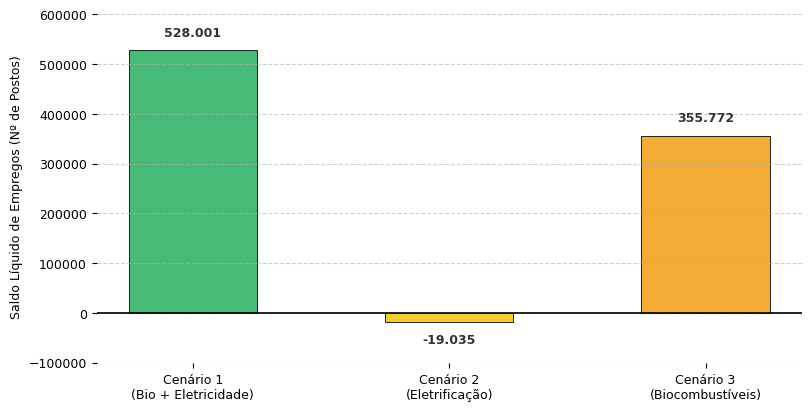

In [55]:
# ==============================================================================
#  FIGURA 9: SALDO LÍQUIDO DE EMPREGOS (Cores fixas por cenário)
# ==============================================================================

TAMANHO_DA_FONTE = 9

# Dados extraídos diretamente dos seus resultados
cenarios_labels = [
    'Cenário 1\n(Bio + Eletricidade)',
    'Cenário 2\n(Eletrificação)',
    'Cenário 3\n(Biocombustíveis)'
]
saldos_emprego = [
    float(cen1['delta_emp'].sum()),
    float(cen2['delta_emp'].sum()),
    float(cen3['delta_emp'].sum())
]

# Cores fixas definidas por você (C1, C2, C3)
colors = ['#27ae60', '#f1c40f', '#f39c12']

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(8, 4), constrained_layout=True)
x_pos = np.arange(len(cenarios_labels))
width = 0.5

rects = ax.bar( x_pos, saldos_emprego, width, color=colors, alpha=0.85, edgecolor='black', linewidth=0.7)

# Estilização
ax.set_ylabel('Saldo Líquido de Empregos (Nº de Postos)', fontsize=TAMANHO_DA_FONTE)
# ax.set_title('Figura 9 – Discrepância no Saldo Líquido de Empregos por Rota Tecnológica')
ax.set_xticks(x_pos)
ax.set_xticklabels(cenarios_labels, fontsize=TAMANHO_DA_FONTE)
ax.axhline(0, color='black', linewidth=1.2)
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.set_xticklabels(cenarios_labels, fontsize=TAMANHO_DA_FONTE)
ax.tick_params(axis='y', labelsize=TAMANHO_DA_FONTE)

# Remove bordas do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Formatação BR: milhar com ponto e sem casas decimais
def fmt_int_br(v):
    return f"{int(round(v)):,}".replace(",", ".")

# Rótulos nas barras (ajusta alinhamento conforme sinal)
for rect, val in zip(rects, saldos_emprego):
    if val >= 0:
        y = val
        offset = 8
        va = 'bottom'
    else:
        y = val
        offset = -8
        va = 'top'  # evita “invadir” os rótulos inferiores

    ax.annotate(
        fmt_int_br(val),
        xy=(rect.get_x() + rect.get_width() / 2, y),
        xytext=(0, offset),
        textcoords="offset points",
        ha='center',
        va=va,
        fontsize=TAMANHO_DA_FONTE,
        fontweight='bold',
        color='#333333'
    )

# Escala Y com margem automática baseada no range (melhor para negativos pequenos)
ymin = min(saldos_emprego)
ymax = max(saldos_emprego)
margin = 0.15 * (ymax - ymin) if ymax != ymin else 1.0
ax.set_ylim(ymin - margin, ymax + margin)

# Dá mais “chão” para os labels do eixo x não brigarem com barra negativa
fig.subplots_adjust(bottom=0.18)

# plt.show()

plt.savefig(
    '../data/graphs/saldo_empregos.pdf',
    bbox_inches='tight'
)